In [16]:
# Custom Functions
from acquire import *
from prepare import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

from wordcloud import WordCloud

from env import user, password, host

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

#### Spam Data

- Load the spam data set.


In [3]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df[df.label == 'ham'].text

id
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [5]:
ham_words = full_clean(' '.join(df[df.label == 'ham'].text))
spam_words = full_clean(' '.join(df[df.label == 'spam'].text))
all_words = full_clean(' '.join(df.text))

In [6]:
ham_words = remove_stopwords(ham_words, extra_words=['r', 'u', '2', 'ltgt', '\''])
spam_words = remove_stopwords(spam_words, extra_words=['r', 'u', '2', 'ltgt', '\''])
all_words = remove_stopwords(all_words, extra_words=['r', 'u', '2', 'ltgt', '\''])

In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [8]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq],axis=1).fillna(0).astype(int)
word_counts.columns = "ham", "spam", "all"

In [9]:
word_counts.head()

,ham,spam,all
get,303,83,386
ok,272,5,277
go,247,31,278
ur,240,144,384
know,232,25,257


- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [10]:
pd.Series(nltk.bigrams(spam_words.split()))

0                   (free, entry)
1                   (entry, wkly)
2                    (wkly, comp)
3                     (comp, win)
4                       (win, fa)
                   ...           
12109        (087187272008, now1)
12110                 (now1, 10p)
12111                  (10p, per)
12112               (per, minute)
12113    (minute, btnationalrate)
Length: 12114, dtype: object

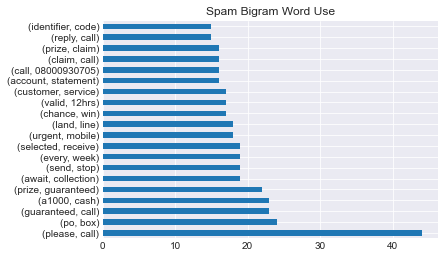

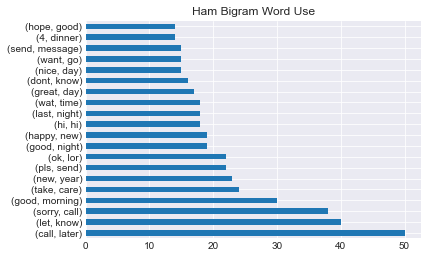

In [11]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20).plot.barh()
plt.title("Spam Bigram Word Use")
plt.show()
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20).plot.barh()
plt.title("Ham Bigram Word Use")
plt.show()

- Is there any overlap in the bigrams for the spam data and the ham data?


<Figure size 1152x648 with 0 Axes>

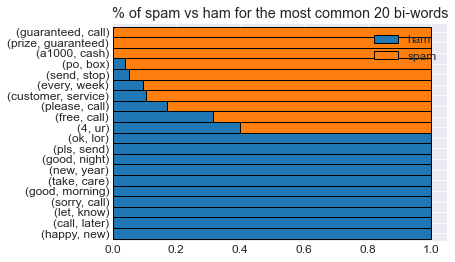

In [12]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=12)

bigram_word_count_spam = pd.Series(nltk.bigrams(spam_words.split())).value_counts()
bigram_word_count_ham = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
bigram_word_count_all = pd.Series(nltk.bigrams(all_words.split())).value_counts()
bigram_word_counts = pd.concat([bigram_word_count_ham, bigram_word_count_spam, bigram_word_count_all],axis=1).fillna(0).astype(int)
bigram_word_counts.columns = "ham", "spam", "all"

(bigram_word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1) # This is what gives us the Ham vs. Spam in all.
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 bi-words')
plt.show()

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [13]:
pd.Series(nltk.ngrams(spam_words.split(), 3))
pd.Series(nltk.ngrams(ham_words.split(), 3))

0              (go, jurong, point)
1           (jurong, point, crazy)
2        (point, crazy, available)
3        (crazy, available, bugis)
4            (available, bugis, n)
                   ...            
36710             (week, gave, us)
36711             (gave, us, free)
36712             (us, free, rofl)
36713           (free, rofl, true)
36714           (rofl, true, name)
Length: 36715, dtype: object

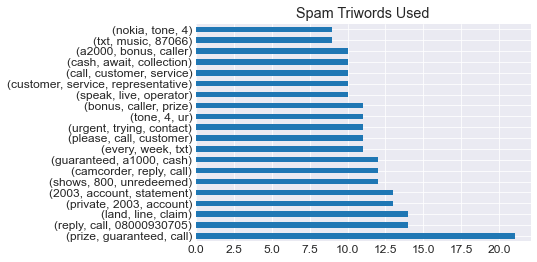

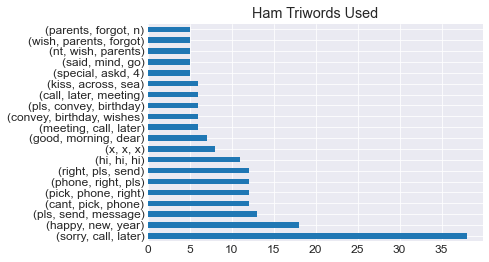

In [14]:
pd.Series(nltk.ngrams(spam_words.split(), 3)).value_counts().head(20).plot.barh()
plt.title("Spam Triwords Used")
plt.show()
pd.Series(nltk.ngrams(ham_words.split(), 3)).value_counts().head(20).plot.barh()
plt.title("Ham Triwords Used")
plt.show()

<Figure size 1152x648 with 0 Axes>

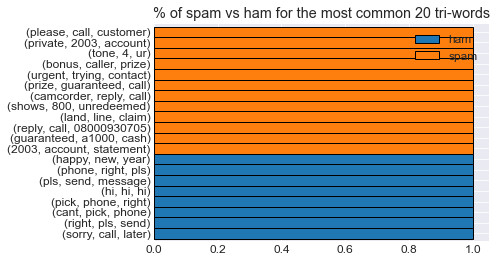

In [15]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=12)

trigram_word_count_spam = pd.Series(nltk.ngrams(spam_words.split(), 3)).value_counts()
trigram_word_count_ham = pd.Series(nltk.ngrams(ham_words.split(),3)).value_counts()
trigram_word_count_all = pd.Series(nltk.ngrams(all_words.split(),3)).value_counts()
trigram_word_counts = pd.concat([trigram_word_count_ham, trigram_word_count_spam, trigram_word_count_all],axis=1).fillna(0).astype(int)
trigram_word_counts.columns = "ham", "spam", "all"

(trigram_word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1) # This is what gives us the Ham vs. Spam in all.
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 tri-words')
plt.show()

##### Word Clouds for Spam and Ham:

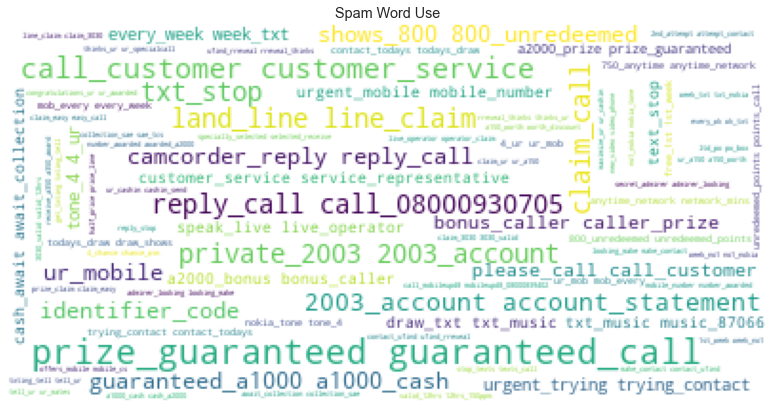

In [20]:
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(spam_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Spam Word Use")
plt.show()

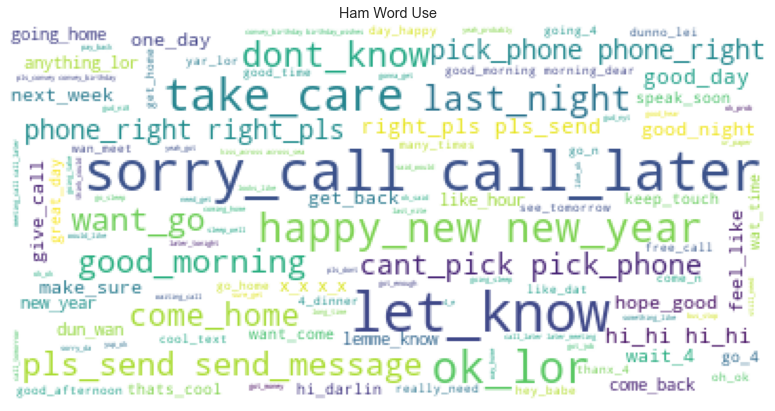

In [19]:
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.bigrams(ham_words.split())).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Ham Word Use")
plt.show()

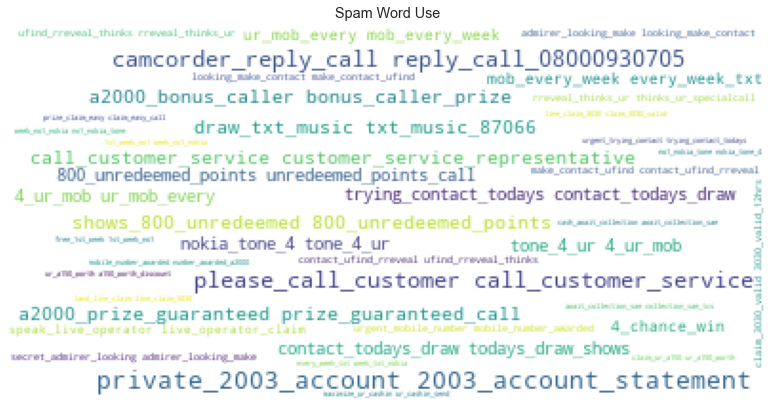

In [22]:
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.ngrams(spam_words.split(),3)).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Spam Word Use")
plt.show()

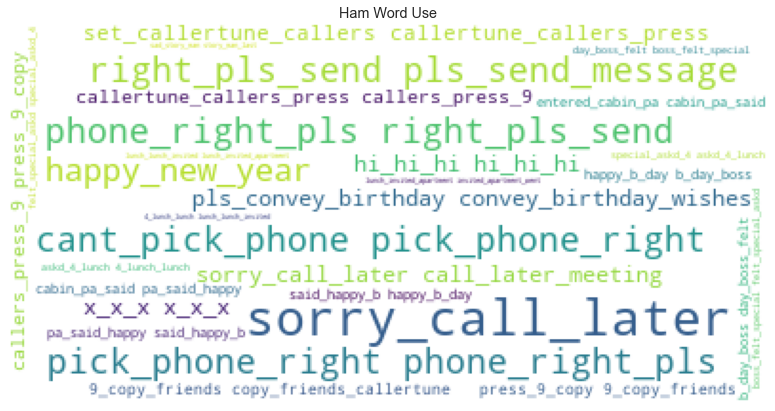

In [23]:
plt.figure(figsize=(14, 7))
img = WordCloud(background_color='white').generate(' '.join(pd.Series(nltk.ngrams(ham_words.split(),3)).apply('_'.join)))
plt.imshow(img)
plt.axis('off')
plt.title("Ham Word Use")
plt.show()

##### Explore the blog articles using the techniques discussed in the exploration lesson.


##### Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.